In [1]:
housing = pd.read_csv('Book1.csv')

<IPython.core.display.Javascript object>

In [2]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.shape

(506, 14)

In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#housing.hist(bins=50,figsize=(20,15))

In [6]:
np.random.seed(42)
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

<IPython.core.display.Javascript object>

In [7]:
train_set,test_set=split_train_test(housing,0.2)

<IPython.core.display.Javascript object>

In [8]:
print(len(train_set),len(test_set))

405 101


In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)

In [10]:
print(len(train_set),len(test_set))

404 102


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index ,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [12]:
corr_matrix=housing.corr()

In [13]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A1FD945B0>,
      dtype=object)

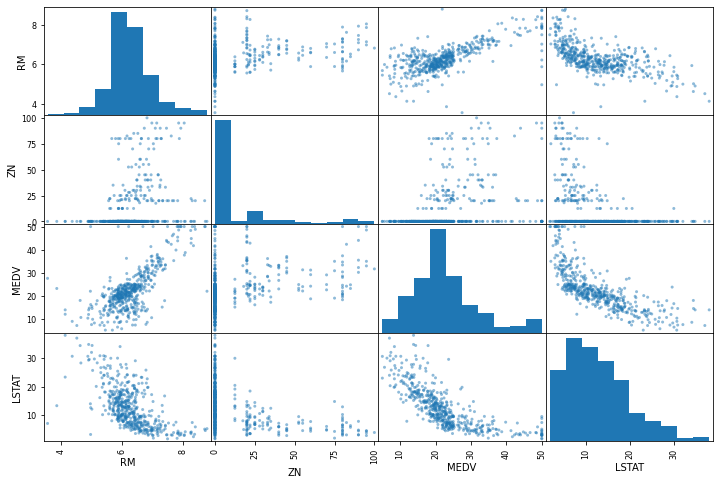

In [14]:
from pandas.plotting import scatter_matrix
attr=['RM','ZN','MEDV','LSTAT']
scatter_matrix(housing[attr],figsize=(12,8))

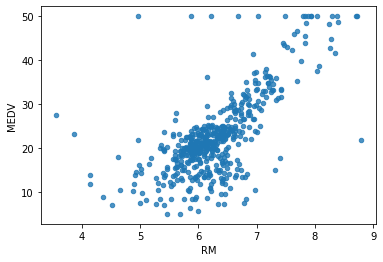

In [15]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [16]:
housing['TAXRM']=housing["TAX"]/housing['RM']

In [17]:
housing['TAXRM']

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

# Creating a Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housing[0:404])

In [40]:
housing_num_tr.shape


(404, 13)

In [41]:
housing =strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [43]:
model

LinearRegression()

In [44]:
some_data=housing.iloc[:5]

In [45]:
some_labels=housing_labels.iloc[:5]

In [46]:
prepared_data=my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [48]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

<IPython.core.display.Javascript object>

In [55]:
lin_mse

23.32234607923367